This is a companion notebook for the book [Deep Learning with Python, Third Edition](https://www.manning.com/books/deep-learning-with-python-third-edition). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

The book's contents are available online at [deeplearningwithpython.io](https://deeplearningwithpython.io).

In [1]:
!pip install keras keras-hub --upgrade -q


[notice] A new release of pip is available: 25.0.1 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
!pip install tensorflow

  Using cached tensorflow-2.20.0-cp312-cp312-win_amd64.whl.metadata (4.6 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-25.12.19-py2.py3-none-any.whl.metadata (1.0 kB)
  Using cached gast-0.7.0-py3-none-any.whl.metadata (1.5 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached setuptools-82.0.0-py3-none-any.whl.metadata (6.6 kB)
  Using cached termcolor-3.3.0-py3-none-any.whl.metadata (6.5 kB)
  Using cached wrapt-2.1.1-cp312-cp312-win_amd64.whl.metadata (7.6 kB)
  Using cached tensorboard-2.20.0-py3-none-any.whl.metadata (1.8 kB)
  Using cached wheel-0.46.3-py3-none-any.whl.metadata (2.4 kB)
  Using cached pillow-12.1.1-cp312-cp312-win_amd64.whl.metadata (9.0 kB)
  Using cached tensorboard_data_server-0.7.2-py3-none-any.whl.metadata (1.1 kB)
  Using cac


[notice] A new release of pip is available: 25.0.1 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
import os
os.environ["KERAS_BACKEND"] = "tensorflow"

In [7]:
# @title
import os
from IPython.core.magic import register_cell_magic

@register_cell_magic
def backend(line, cell):
    current, required = os.environ.get("KERAS_BACKEND", ""), line.split()[-1]
    if current == required:
        get_ipython().run_cell(cell)
    else:
        print(
            f"This cell requires the {required} backend. To run it, change KERAS_BACKEND to "
            f"\"{required}\" at the top of the notebook, restart the runtime, and rerun the notebook."
        )

## The mathematical building blocks of neural networks

### A first look at a neural network

In [9]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [10]:
train_images.shape

(60000, 28, 28)

In [11]:
len(train_labels)

60000

In [12]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], shape=(60000,), dtype=uint8)

In [13]:
test_images.shape

(10000, 28, 28)

In [14]:
len(test_labels)

10000

In [15]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], shape=(10000,), dtype=uint8)

In [16]:
import keras
from keras import layers

model = keras.Sequential(
    [
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax"),
    ]
)

In [17]:
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
)

In [18]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

In [19]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9245 - loss: 0.2655
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9680 - loss: 0.1085
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9791 - loss: 0.0709
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9852 - loss: 0.0495
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9887 - loss: 0.0377


In [20]:
test_digits = test_images[0:10]
predictions = model.predict(test_digits)
predictions[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


array([3.6047779e-06, 1.8350192e-08, 3.4575846e-06, 2.7069903e-04,
       1.6658287e-10, 8.4934175e-07, 6.9105710e-10, 9.9963331e-01,
       1.0140918e-06, 8.6958120e-05], dtype=float32)

In [21]:
predictions[0].argmax()

np.int64(7)

In [22]:
predictions[0][7]

np.float32(0.9996333)

In [23]:
test_labels[0]

np.uint8(7)

In [24]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9772 - loss: 0.0770
test_acc: 0.9771999716758728


### Data representations for neural networks

#### Scalars (rank-0 tensors)

In [25]:
import numpy as np
x = np.array(12)
x

array(12)

In [26]:
x.ndim

0

#### Vectors (rank-1 tensors)

In [35]:
x = np.array([12, 3, 6, 14, 7])
x

array([12,  3,  6, 14,  7])

In [36]:
x.ndim

1

In [37]:
x.shape

(5,)

#### Matrices (rank-2 tensors)

In [38]:
x = np.array([[5, 78, 2, 34, 0],
              [6, 79, 3, 35, 1],
              [7, 80, 4, 36, 2]])
x.ndim

2

In [39]:
x.shape

(3, 5)

#### Rank-3 tensors and higher-rank tensors

In [40]:
x = np.array([[[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]]])
x.ndim

3

In [41]:
x.shape

(3, 3, 5)

#### Key attributes

In [42]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [43]:
train_images.ndim

3

In [44]:
train_images.shape

(60000, 28, 28)

In [45]:
train_images.dtype

dtype('uint8')

In [47]:
!pip install matplotlib

  Using cached matplotlib-3.10.8-cp312-cp312-win_amd64.whl.metadata (52 kB)
  Using cached contourpy-1.3.3-cp312-cp312-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.61.1-cp312-cp312-win_amd64.whl.metadata (116 kB)
  Using cached kiwisolver-1.4.9-cp312-cp312-win_amd64.whl.metadata (6.4 kB)
  Using cached pyparsing-3.3.2-py3-none-any.whl.metadata (5.8 kB)
Using cached matplotlib-3.10.8-cp312-cp312-win_amd64.whl (8.1 MB)
Using cached contourpy-1.3.3-cp312-cp312-win_amd64.whl (226 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.61.1-cp312-cp312-win_amd64.whl (2.3 MB)
Using cached kiwisolver-1.4.9-cp312-cp312-win_amd64.whl (73 kB)
Using cached pyparsing-3.3.2-py3-none-any.whl (122 kB)



[notice] A new release of pip is available: 25.0.1 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


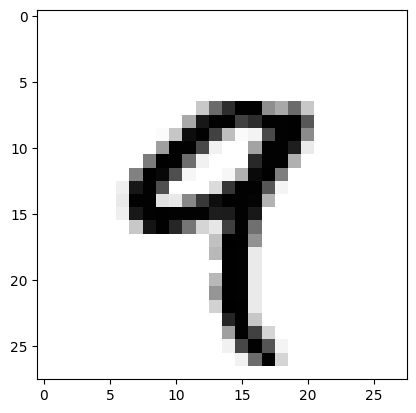

In [48]:
import matplotlib.pyplot as plt

digit = train_images[4]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [49]:
train_labels[4]

np.uint8(9)

#### Manipulating tensors in NumPy

In [50]:
my_slice = train_images[10:100]
my_slice.shape

(90, 28, 28)

In [51]:
my_slice = train_images[10:100, :, :]
my_slice.shape

(90, 28, 28)

In [52]:
my_slice = train_images[10:100, 0:28, 0:28]
my_slice.shape

(90, 28, 28)

In [ ]:
#Pixeles d le esquina inderior derecha
my_slice = train_images[:, 14:, 14:]
my_slice.shape

(60000, 14, 14)


Con ese corte estás quedándote con un **cuadrante 14×14 en la esquina inferior derecha** de cada imagen 28×28.

#### Interpretación de `[:, 14:, 14:]`

- **`:`** → todas las imágenes (las 60.000).
- **`14:`** en el segundo eje → filas desde la 14 hasta el final (filas 14–27).
- **`14:`** en el tercer eje → columnas desde la 14 hasta el final (columnas 14–27).

#### Esquema de una imagen 28×28

```
         columnas 0        14        27
         ├─────────────┬─────────────┤
 fila 0  │             │             │
   ...   │   no usado  │   no usado  │
 13      │             │             │
         ├─────────────┼─────────────┤
 14      │             │  ✓ extraído │
   ...   │   no usado  │  (14×14)    │
 27      │             │             │
         └─────────────┴─────────────┘
```

#### Qué se obtiene

- Una región **14×14** en la **esquina inferior derecha** de cada imagen.
- En MNIST, ahí suelen quedar parte del trazo de los dígitos cuando están centrados o ligeramente abajo y a la derecha.

Resultado de `my_slice.shape`: **(60000, 14, 14)** — 60.000 imágenes, cada una de tamaño 14×14.

In [56]:

#Pixeles centrados qutando los 7 de cada extremo, es un recorte
my_slice = train_images[:, 7:-7, 7:-7]
my_slice.shape

(60000, 14, 14)


Con ese corte obtienes el **centro 14×14** de cada imagen 28×28.

#### Interpretación de `[:, 7:-7, 7:-7]`

- **`7:-7`** → desde el índice 7 hasta el índice -7 (sin incluirlo).
  - En un eje de longitud 28, `-7` equivale al índice 21.
  - Resultado: índices 7, 8, ..., 20 → 14 elementos.

En filas y columnas se quitan **7 píxeles por lado** y te quedas con una zona central de **14×14**.

#### Esquema

```
            columnas 0  7      20  27
            ├─────────┬──────────┬─────────┤
 fila 0     │         │          │         │
  ...       │  borde  │          │  borde  │
 6          │  7 px   │          │  7 px   │
            ├─────────┼──────────┼─────────┤
 7          │         │   CENTRO │         │
  ...       │  borde  │   14×14  │  borde  │
 20         │  7 px   │          │  7 px   │
            ├─────────┼──────────┼─────────┤
 21         │         │          │         │
  ...       │  borde  │          │  borde  │
 27         │         │          │         │
            └─────────┴──────────┴─────────┘
```

#### Qué se obtiene

- Un recorte central 14×14.
- Se elimina un marco de 7 píxeles en los cuatro lados.
- En MNIST, el dígito suele estar centrado, así que se mantiene casi todo el contenido útil y se descarta ruido o márgenes de los bordes.

`my_slice.shape` → **(60000, 14, 14)**.

#### Comparación con el otro corte

| Corte | Región | Posición |
|-------|--------|----------|
| `[:, 14:, 14:]` | 14×14 | Esquina inferior derecha |
| `[:, 7:-7, 7:-7]` | 14×14 | Centro de la imagen |

#### The notion of data batches

In [57]:
batch = train_images[:128]

In [58]:
batch = train_images[128:256]

In [59]:
n = 3
batch = train_images[128 * n : 128 * (n + 1)]

#### Real-world examples of data tensors

##### Vector data

##### Timeseries data or sequence data

##### Image data

##### Video data

### The gears of neural networks: Tensor operations

#### Element-wise operations


This function is a **manual (naive) implementation of ReLU** for 2D arrays.

##### What ReLU does

ReLU (Rectified Linear Unit) applies `max(x, 0)` to each element:
- If `x > 0` → output is `x`
- If `x ≤ 0` → output is `0`

##### Step-by-step

```python
def naive_relu(x):
    assert len(x.shape) == 2    # 1. Only accept 2D arrays (matrices)
    x = x.copy()               # 2. Copy so we don't modify the original
    for i in range(x.shape[0]): # 3. Loop over rows
        for j in range(x.shape[1]): # 4. Loop over columns
            x[i, j] = max(x[i, j], 0)  # 5. Apply ReLU to each element
    return x
```

| Line | Purpose |
|------|---------|
| `assert len(x.shape) == 2` | Ensure the input is a 2D array (matrix) |
| `x = x.copy()` | Operate on a copy so the original array is unchanged |
| Nested loops | Iterate over every element `(i, j)` |
| `max(x[i, j], 0)` | ReLU: keep positive values, zero out negative ones |

##### Why "naive"?

This uses explicit Python loops and is slow for large arrays.

In practice you would use vectorized operations:
```python
np.maximum(x, 0)   # NumPy
# or
keras.activations.relu(x)  # Keras
```

NumPy/Keras process all elements at once in optimized C code, which is much faster than looping in Python.

##### Role in the book

It shows how ReLU works element-wise and is meant to support understanding of the math, not as production code.

In [60]:
def naive_relu(x):
    assert len(x.shape) == 2
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] = max(x[i, j], 0)
    return x

In [61]:
def naive_add(x, y):
    assert len(x.shape) == 2
    assert x.shape == y.shape
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[i, j]
    return x

In [62]:
import time

x = np.random.random((20, 100))
y = np.random.random((20, 100))

t0 = time.time()
for _ in range(1000):
    z = x + y
    z = np.maximum(z, 0.0)
print("Took: {0:.2f} s".format(time.time() - t0))

Took: 0.01 s


In [63]:
t0 = time.time()
for _ in range(1000):
    z = naive_add(x, y)
    z = naive_relu(z)
print("Took: {0:.2f} s".format(time.time() - t0))

Took: 1.04 s


#### Broadcasting

In [71]:
import numpy as np

X = np.random.random((32, 10))
y = np.random.random((10,))
y

array([0.79999294, 0.23701526, 0.45113135, 0.8579068 , 0.83777511,
       0.70284883, 0.99326295, 0.23986221, 0.82168327, 0.17354651])


##### ¿Qué hace `np.expand_dims(y, axis=0)`?

Inserta una nueva dimensión en la posición 0 del array `y`, aumentando el rango en 1.

###### Ejemplo

```python
import numpy as np

y = np.array([1, 2, 3])
y.shape   # (3,) — vector de 3 elementos

y_expanded = np.expand_dims(y, axis=0)
y_expanded.shape   # (1, 3) — matriz 1×3
y_expanded         # array([[1, 2, 3]])
```

Antes: `[1, 2, 3]` (shape `(3,)`)  
Después: `[[1, 2, 3]]` (shape `(1, 3)`)

##### Interpretación de `axis=0`

- `axis=0` → se agrega la dimensión al principio.
- La primera dimensión pasa de tener tamaño 3 a tener tamaño 1.

Equivalente a usar `reshape`:

```python
y.reshape(1, -1)   # mismo resultado que expand_dims(y, axis=0)
```

##### Uso típico en deep learning

Se usa cuando necesitas un **batch** de tamaño 1:

- `y` = predicción para una sola muestra, shape `(10,)` (10 clases).
- Red: espera input `(batch_size, 10)`.
- `np.expand_dims(y, axis=0)` → shape `(1, 10)` → “batch” de una muestra.

Ejemplo con Keras:

```python
# predicción para una sola imagen
pred = model.predict(np.expand_dims(image, axis=0))
# image: (28, 28) → (1, 28, 28) para que el modelo reciba un batch
```

##### Otros valores de `axis`

```python
y = np.array([1, 2, 3])

np.expand_dims(y, axis=0).shape   # (1, 3) — dimensión al inicio
np.expand_dims(y, axis=1).shape   # (3, 1) — dimensión al final
# axis=-1 también da (3, 1)
```

In [72]:
y = np.expand_dims(y, axis=0)
y

array([[0.79999294, 0.23701526, 0.45113135, 0.8579068 , 0.83777511,
        0.70284883, 0.99326295, 0.23986221, 0.82168327, 0.17354651]])

In [73]:
Y = np.tile(y, (32, 1))
Y

array([[0.79999294, 0.23701526, 0.45113135, 0.8579068 , 0.83777511,
        0.70284883, 0.99326295, 0.23986221, 0.82168327, 0.17354651],
       [0.79999294, 0.23701526, 0.45113135, 0.8579068 , 0.83777511,
        0.70284883, 0.99326295, 0.23986221, 0.82168327, 0.17354651],
       [0.79999294, 0.23701526, 0.45113135, 0.8579068 , 0.83777511,
        0.70284883, 0.99326295, 0.23986221, 0.82168327, 0.17354651],
       [0.79999294, 0.23701526, 0.45113135, 0.8579068 , 0.83777511,
        0.70284883, 0.99326295, 0.23986221, 0.82168327, 0.17354651],
       [0.79999294, 0.23701526, 0.45113135, 0.8579068 , 0.83777511,
        0.70284883, 0.99326295, 0.23986221, 0.82168327, 0.17354651],
       [0.79999294, 0.23701526, 0.45113135, 0.8579068 , 0.83777511,
        0.70284883, 0.99326295, 0.23986221, 0.82168327, 0.17354651],
       [0.79999294, 0.23701526, 0.45113135, 0.8579068 , 0.83777511,
        0.70284883, 0.99326295, 0.23986221, 0.82168327, 0.17354651],
       [0.79999294, 0.23701526, 0.4511313

In [74]:
def naive_add_matrix_and_vector(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[j]
    return x

In [77]:
import numpy as np

x = np.random.random((64, 3, 32, 10))
y = np.random.random((32, 10))
z = np.maximum(x, y)


##### Broadcasting en este caso

- **x** shape: `(64, 3, 32, 10)` — 4D  
- **y** shape: `(32, 10)` — 2D  

NumPy compara las dimensiones **de derecha a izquierda**:

| x      | 64 | 3  | 32 | 10 |
|--------|----|----|----|-----|
| y      | —  | —  | 32 | 10 |
| ¿match?| ✓  | ✓  | ✓  | ✓  |

Las últimas dimensiones coinciden: 32 y 10. Las dos primeras de x (64 y 3) no existen en y, así que **y se repite** en esos ejes.

Conceptualmente, **y** pasa de `(32, 10)` a `(64, 3, 32, 10)` repitiendo el mismo bloque `(32, 10)` para cada combinación de (64, 3).

##### Resultado

- `np.maximum(x, y)` aplica el máximo elemento a elemento.
- Cada bloque `(32, 10)` de x se compara con el mismo `(32, 10)` de y (replicado).
- **z** tiene shape `(64, 3, 32, 10)`.

##### Resumen

`y` actúa como un bloque `(32, 10)` que se usa repetidamente para todos los 64×3 bloques de x; NumPy hace esa repetición sin copiar memoria (broadcasting).

In [100]:
x_y = x + y
assert(x_y[0][0]== x[0][0]+y).all()
assert(x_y[0][1]== x[0][1]+y).all()
assert(x_y[1][0]== x[1][0]+y).all()
assert(x_y[1][1]== x[1][1]+y).all()



#### ¿Qué hacen estas líneas?

Comprueban que el broadcasting de `x + y` se comporta como se espera: que cada bloque de `x` se suma con el mismo `y`.

#### Comprobaciones

Supongamos que `x` tiene shape `(2, 2, 32, 10)` (o similar) y `y` tiene shape `(32, 10)`:

| Assert | Idea |
|--------|------|
| `x_y[0][0] == x[0][0] + y` | El bloque (0,0) de `x_y` es el bloque (0,0) de `x` más `y` |
| `x_y[0][1] == x[0][1] + y` | Idem con el bloque (0,1) |
| `x_y[1][0] == x[1][0] + y` | Idem con el bloque (1,0) |
| `x_y[1][1] == x[1][1] + y` | Idem con el bloque (1,1) |

Cada `x[i][j]` tiene shape `(32, 10)`, igual que `y`, así que la suma es elemento a elemento.

#### Qué representan

- **x_y** = resultado de `x + y` con broadcasting.
- En cada posición `(i, j)` en los dos primeros ejes, `y` (que es `(32, 10)`) se suma al bloque `x[i][j]` de forma que se repite el mismo `y` para todos esos bloques.

#### Qué hace `.all()`

`(x_y[0][0] == x[0][0] + y)` devuelve un array booleano `(32, 10)`.  
`.all()` da `True` solo si todos los elementos son `True`, es decir, si la igualdad es correcta en cada posición.

En conjunto: las aserciones verifican que el broadcasting suma el mismo `y` a cada uno de los bloques `(32, 10)` de `x`.

#### Tensor product

In [0]:
x = np.random.random((32,))
y = np.random.random((32,))

z = np.matmul(x, y)
z = x @ y

In [0]:
def naive_vector_product(x, y):
    assert len(x.shape) == 1
    assert len(y.shape) == 1
    assert x.shape[0] == y.shape[0]
    z = 0.0
    for i in range(x.shape[0]):
        z += x[i] * y[i]
    return z

In [0]:
def naive_matrix_vector_product(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            z[i] += x[i, j] * y[j]
    return z

In [0]:
def naive_matrix_vector_product(x, y):
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        z[i] = naive_vector_product(x[i, :], y)
    return z

In [0]:
def naive_matrix_product(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 2
    assert x.shape[1] == y.shape[0]
    z = np.zeros((x.shape[0], y.shape[1]))
    for i in range(x.shape[0]):
        for j in range(y.shape[1]):
            row_x = x[i, :]
            column_y = y[:, j]
            z[i, j] = naive_vector_product(row_x, column_y)
    return z

#### Tensor reshaping

In [0]:
train_images = train_images.reshape((60000, 28 * 28))

In [0]:
x = np.array([[0., 1.],
              [2., 3.],
              [4., 5.]])
x.shape

In [0]:
x = x.reshape((6, 1))
x

In [0]:
x = x.reshape((2, 3))
x

In [0]:
x = np.zeros((300, 20))
x = np.transpose(x)
x.shape

#### Geometric interpretation of tensor operations

#### A geometric interpretation of deep learning

### The engine of neural networks: Gradient-based optimization

#### What's a derivative?

#### Derivative of a tensor operation: The gradient

#### Stochastic gradient descent

#### Chaining derivatives: The Backpropagation algorithm

##### The chain rule

##### Automatic differentiation with computation graphs

### Looking back at our first example

In [0]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

In [0]:
model = keras.Sequential(
    [
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax"),
    ]
)

In [0]:
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
)

In [0]:
model.fit(
    train_images,
    train_labels,
    epochs=5,
    batch_size=128,
)

#### Reimplementing our first example from scratch

##### A simple Dense class

In [0]:
import keras
from keras import ops

class NaiveDense:
    def __init__(self, input_size, output_size, activation=None):
        self.activation = activation
        self.W = keras.Variable(
            shape=(input_size, output_size), initializer="uniform"
        )
        self.b = keras.Variable(shape=(output_size,), initializer="zeros")

    def __call__(self, inputs):
        x = ops.matmul(inputs, self.W)
        x = x + self.b
        if self.activation is not None:
            x = self.activation(x)
        return x

    @property
    def weights(self):
        return [self.W, self.b]

##### A simple Sequential class

In [0]:
class NaiveSequential:
    def __init__(self, layers):
        self.layers = layers

    def __call__(self, inputs):
        x = inputs
        for layer in self.layers:
            x = layer(x)
        return x

    @property
    def weights(self):
        weights = []
        for layer in self.layers:
            weights += layer.weights
        return weights

In [0]:
model = NaiveSequential(
    [
        NaiveDense(input_size=28 * 28, output_size=512, activation=ops.relu),
        NaiveDense(input_size=512, output_size=10, activation=ops.softmax),
    ]
)
assert len(model.weights) == 4

##### A batch generator

In [0]:
import math

class BatchGenerator:
    def __init__(self, images, labels, batch_size=128):
        assert len(images) == len(labels)
        self.index = 0
        self.images = images
        self.labels = labels
        self.batch_size = batch_size
        self.num_batches = math.ceil(len(images) / batch_size)

    def next(self):
        images = self.images[self.index : self.index + self.batch_size]
        labels = self.labels[self.index : self.index + self.batch_size]
        self.index += self.batch_size
        return images, labels

#### Running one training step

##### The weight update step

In [0]:
learning_rate = 1e-3

def update_weights(gradients, weights):
    for g, w in zip(gradients, weights):
        w.assign(w - g * learning_rate)

In [0]:
from keras import optimizers

optimizer = optimizers.SGD(learning_rate=1e-3)

def update_weights(gradients, weights):
    optimizer.apply_gradients(zip(gradients, weights))

##### Gradient computation

In [0]:
%%backend tensorflow
import tensorflow as tf

x = tf.zeros(shape=())
with tf.GradientTape() as tape:
    y = 2 * x + 3
grad_of_y_wrt_x = tape.gradient(y, x)

In [0]:
%%backend tensorflow
def one_training_step(model, images_batch, labels_batch):
    with tf.GradientTape() as tape:
        predictions = model(images_batch)
        loss = ops.sparse_categorical_crossentropy(labels_batch, predictions)
        average_loss = ops.mean(loss)
    gradients = tape.gradient(average_loss, model.weights)
    update_weights(gradients, model.weights)
    return average_loss

#### The full training loop

In [0]:
%%backend tensorflow
def fit(model, images, labels, epochs, batch_size=128):
    for epoch_counter in range(epochs):
        print(f"Epoch {epoch_counter}")
        batch_generator = BatchGenerator(images, labels)
        for batch_counter in range(batch_generator.num_batches):
            images_batch, labels_batch = batch_generator.next()
            loss = one_training_step(model, images_batch, labels_batch)
            if batch_counter % 100 == 0:
                print(f"loss at batch {batch_counter}: {loss:.2f}")

In [0]:
%%backend tensorflow
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

fit(model, train_images, train_labels, epochs=10, batch_size=128)

#### Evaluating the model

In [0]:
%%backend tensorflow
predictions = model(test_images)
predicted_labels = ops.argmax(predictions, axis=1)
matches = predicted_labels == test_labels
f"accuracy: {ops.mean(matches):.2f}"